<a href="https://colab.research.google.com/github/pastenar/pytorch101/blob/main/1_0_pytorch_workflow_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Workflow

Resources:
- repo: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
- online book: https://www.learnpytorch.io/01_pytorch_workflow/

Items:
1. Data (prepare and load)
2. Build a model
3. Fitting model to data (training)
4. making predictions and evaluating the model (inference).
5. saving and load the model
6. putting all together.

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu124'

## 1.Data (preparing and loading)

### Splitting Data



In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
# Create train - test split.

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  plt.figure(figsize=(8,5))
  # Plot Train data
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training data ")
  # Plot Test data
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testng data ")

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  plt.legend(prop={'size':14})


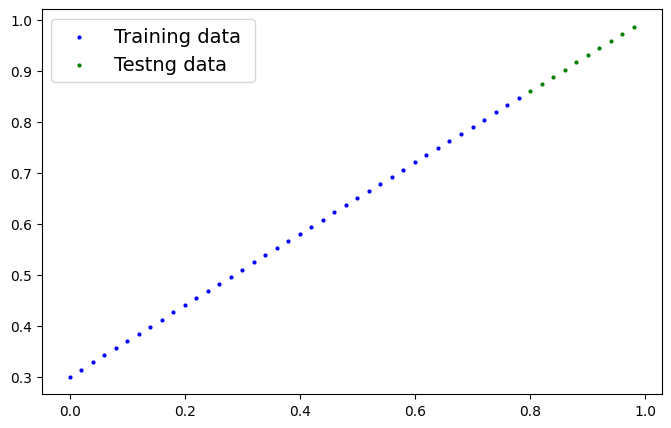

In [ ]:
plot_predictions()

## 2. Build a Model

Build a linear regression model

In [ ]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Initialise model parameters
    self.weights = nn.Parameter(torch.rand(1,
                                           requires_grad = True, # if the parameter requires gradeient, torch.autograd
                                           dtype = torch.float))

    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad = True,
                                        dtype = torch.float))

  # Forward method to define the computation in the model (at call)
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias


Pytorch model building essentials

* ``torch.nn`` - contains all of the buildings for computational graphs
* ``torch.nn.Parameters`` - what parameters should our model try and learn, often a PyTorch layer  from torch.nn will set these for us
* ``torch.nn.Module`` - The base class for all neural modules, if you subclass it, you should overwrite forward()
* ``torch.optim`` - this where the optimizer in Pytorch live, They will help with gradient descent
* ``def forward()`` - All nn.Module require you to overwrite forward(), this method overwrite defines what happens in the forward computation.


In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Make predictions using ``torch.inference_mode()``


In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

# Other option but not preferred:
#   with torch.no_grad():
#     y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

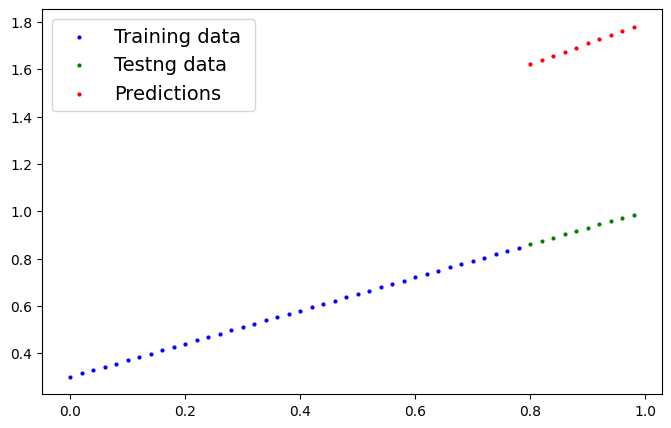

In [ ]:
plot_predictions(predictions=y_preds)

## Train  Model

What's needed:
  - **Loss function**: how wrong your model predictions, lower is better
  - **Optimizer**: adjust base in the loss function

for pytorch you need:
  - A training loop
  - A testin loop

In [ ]:
# Loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr = 0.01 # learning rate,
                            )


### Building a training loop (and testing)

Whats need:
0. Loop through the data
1. Forward pass (data moving through ``forward()`` of the model) to make predictions - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truht labels)
3. Optimzer zero grad
4. Loss backward - move backward throught the network to calculate the gradients of each of the parameters of our model with respecto to the loss (**backpropagation**)
5. Optimizer step - use optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
# the number of loops over the data
epochs = 1


## TRAINING

# 0. Loop through data
for epoch in range(epochs):
  # Set modelo to training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()



  model_0.eval()
